# Module 9

For this weeks assignment I returned to the dataset from module 2 which was the loan default dataset. In this weeks assignment I applied supervised learning techniques to identify defaults. 

Report outline:
- Import of the dataset 
- Split into train and test samples
  - I created a new dataframe to look at the data type of each feature in the dataset
  - Then I grouped by the prefix of each features name to see the number of features generated from a given source (MB/AP/CD)
  - Then I created individual lists to isolate the features by their source 
- Random Forest
  - Hyperparameters adjusted: ntrees, nfolds, min_rows
- Gradient Boosting Machine
  - Hyperparameters adjusted: ntrees, nfolds, min_rows, max_depth, fold_assignment

In [36]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [4]:
os.chdir('C:/Users/rdiml/Documents/')

In [7]:
mortgage = pd.read_csv("XYZloan_default_selected_vars.csv")
mortgage.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [8]:
train, test = train_test_split(mortgage, test_size=0.30, random_state=42)

In [11]:
train.shape

(56000, 89)

In [12]:
test.shape

(24000, 89)

In [17]:
train_vars = pd.DataFrame(train.dtypes)

In [18]:
#when I created the original df it had the column named "index" as the actual index column 
#by using .reset_index() I am making this original index column a new column 
train_vars = pd.DataFrame(train.dtypes).reset_index()
train_vars.head()

,index,0
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [19]:
train_vars.columns = ['variablename', 'dtype'] #renaming the column headers
train_vars.head()

,variablename,dtype
0,Unnamed: 0,int64
1,Unnamed: 0.1,int64
2,id,int64
3,loan_default,int64
4,AP001,int64


In [20]:
train_vars['source'] = train_vars['variablename'].str[:2] #new column source by taking the 0 and 1 index of the other column
train_vars.head

<bound method NDFrame.head of     variablename    dtype source
0     Unnamed: 0    int64     Un
1   Unnamed: 0.1    int64     Un
2             id    int64     id
3   loan_default    int64     lo
4          AP001    int64     AP
5          AP002    int64     AP
6          AP003    int64     AP
7          AP004    int64     AP
8          AP005   object     AP
9          AP006   object     AP
10         AP007    int64     AP
11         AP008    int64     AP
12         AP009    int64     AP
13         TD001    int64     TD
14         TD002    int64     TD
15         TD005    int64     TD
16         TD006    int64     TD
17         TD009    int64     TD
18         TD010    int64     TD
19         TD013    int64     TD
20         TD014    int64     TD
21         TD015    int64     TD
22         TD022  float64     TD
23         TD023  float64     TD
24         TD024  float64     TD
25         TD025  float64     TD
26         TD026  float64     TD
27         TD027  float64     TD
28         TD

In [22]:
train_vars['source'].value_counts()

CD    36
TD    24
AP     9
CR     8
PA     6
MB     2
Un     2
lo     1
id     1
Name: source, dtype: int64

In [24]:
MB_list = list(train_vars[train_vars['source']=='MB']['variablename'])
#selecting all AP variables except those equal to AP004 with !=
AP_list = list(train_vars[(train_vars['source']=='AP') & (train_vars['variablename']!='AP004')]['variablename']) 
TD_list = list(train_vars[train_vars['source']=='TD']['variablename'])
CR_list = list(train_vars[train_vars['source']=='CR']['variablename'])
PA_list = list(train_vars[train_vars['source']=='PA']['variablename'])
CD_list = list(train_vars[train_vars['source']=='CD']['variablename'])
AP_list

['AP001', 'AP002', 'AP003', 'AP005', 'AP006', 'AP007', 'AP008', 'AP009']

In [25]:
train['loan_default'].value_counts(dropna=False)

0    45180
1    10820
Name: loan_default, dtype: int64

## H2o

In [29]:
pip install h2o

  Stored in directory: C:\Users\rdiml\AppData\Local\pip\Cache\wheels\7d\09\bc\23eaa75a5948deb1d6c88d9ee3a20f94bac7d9df6c55ec8aa3
  Stored in directory: C:\Users\rdiml\AppData\Local\pip\Cache\wheels\e1\41\5e\e201f95d90fc84f93aa629b6638adacda680fe63aac47174ab
Successfully built h2o tabulate
Note: you may need to restart the kernel to use updated packages.


In [30]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.231-b11, mixed mode)
  Starting server from C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\rdiml\AppData\Local\Temp\tmp1r3hzwq9
  JVM stdout: C:\Users\rdiml\AppData\Local\Temp\tmp1r3hzwq9\h2o_rdiml_started_from_python.out
  JVM stderr: C:\Users\rdiml\AppData\Local\Temp\tmp1r3hzwq9\h2o_rdiml_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.10
H2O cluster version age:,9 days
H2O cluster name:,H2O_from_python_rdiml_nv8j0w
H2O cluster total nodes:,1
H2O cluster free memory:,3.533 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [31]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [32]:
target = 'loan_default' #label we are trying to identify

In [33]:
train_smpl = train.sample(frac=0.1, random_state=1)
test_smpl = test.sample(frac=0.1, random_state=1)
train_hex = h2o.H2OFrame(train_smpl)
test_hex = h2o.H2OFrame(test_smpl)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [34]:
predictors = CR_list + TD_list + AP_list + MB_list + CR_list + PA_list 

## Random Forest

In [35]:
rf_v1 = H2ORandomForestEstimator(
        model_id = 'rf_v1',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v1.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


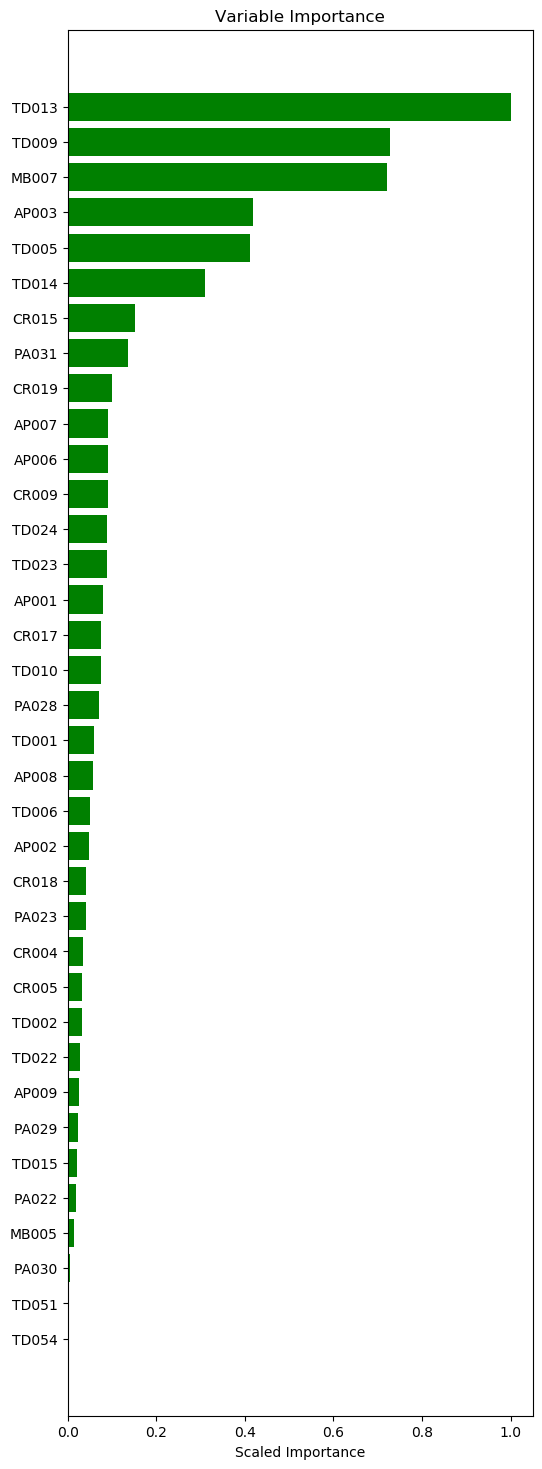

In [37]:
def VarImp(model_name):    
    # plot the variable importance
    plt.rcdefaults()
    variables = model_name._model_json['output']['variable_importances']['variable']
    y_pos = np.arange(len(variables))
    fig, ax = plt.subplots(figsize = (6,len(variables)/2))
    scaled_importance = model_name._model_json['output']['variable_importances']['scaled_importance']
    ax.barh(y_pos,scaled_importance,align='center',color='green')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(variables)
    ax.invert_yaxis()
    ax.set_xlabel('Scaled Importance')
    ax.set_title('Variable Importance')
    plt.show()
    
VarImp(rf_v1)

In [39]:
test_hex['loan_default'].head()

loan_default
0
0
0
0
0
0
1
0
0
0


In [40]:
predictions = rf_v1.predict(test_hex)
predictions.head()

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)


predict
0.186251
0.127801
0.157569
0.179994
0.319644
0.104038
0.106122
0.316604
0.0882286
0.275931


In [41]:
test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()
test_scores.head()

,loan_default,predict
0,0,0.186251
1,0,0.127801
2,0,0.157569
3,0,0.179994
4,0,0.319644


In [42]:
def createGains(model):
    predictions = model.predict(test_hex)
    test_scores = test_hex['loan_default'].cbind(predictions).as_data_frame()

    #sort on prediction (descending), add id, and decile for groups containing 1/10 of datapoints
    test_scores = test_scores.sort_values(by='predict',ascending=False)
    test_scores['row_id'] = range(0,0+len(test_scores))
    test_scores['decile'] = ( test_scores['row_id'] / (len(test_scores)/10) ).astype(int)
    #see count by decile
    test_scores.loc[test_scores['decile'] == 10]=9
    test_scores['decile'].value_counts()

    #create gains table
    gains = test_scores.groupby('decile')['loan_default'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    #add features to gains table
    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10 
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] -  gains['percent_cum_non_actual'] ) * 100
    gains['gain']=(gains['cum_actual']/gains['cum_count']*100).round(2)
    gains = pd.DataFrame(gains)
    return(gains)

createGains(rf_v1)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,82,158,240,82,158,0.17,0.08,49.0,1.67,9.0,34.17
1,240,72,168,480,154,326,0.31,0.17,98.0,1.57,14.0,32.08
2,240,59,181,720,213,507,0.43,0.27,147.0,1.45,16.0,29.58
3,240,53,187,960,266,694,0.54,0.36,196.0,1.36,18.0,27.71
4,240,54,186,1200,320,880,0.65,0.46,245.0,1.31,19.0,26.67
5,240,44,196,1440,364,1076,0.74,0.56,294.0,1.24,18.0,25.28
6,240,40,200,1680,404,1276,0.82,0.67,343.0,1.18,15.0,24.05
7,240,36,204,1920,440,1480,0.90,0.77,392.0,1.12,13.0,22.92
8,240,28,212,2160,468,1692,0.96,0.89,441.0,1.06,7.0,21.67


In [43]:
def ROC_AUC(my_result,df,target):
    from sklearn.metrics import roc_curve,auc
    from sklearn.metrics import average_precision_score
    from sklearn.metrics import precision_recall_curve
    import matplotlib.pyplot as plt

    # ROC
    y_actual = df[target].as_data_frame()
    y_pred = my_result.predict(df).as_data_frame()
    fpr = list()
    tpr = list()
    roc_auc = list()
    fpr,tpr,_ = roc_curve(y_actual,y_pred)
    roc_auc = auc(fpr,tpr)
    
    # Precision-Recall
    average_precision = average_precision_score(y_actual,y_pred)

    print('')
    print('   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate')
    print('')
    print('	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy')
    print('')
    print('   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)')
    print('')
    
    # plotting
    plt.figure(figsize=(10,4))

    # ROC
    plt.subplot(1,2,1)
    plt.plot(fpr,tpr,color='darkorange',lw=2,label='ROC curve (aare=%0.2f)' % roc_auc)
    plt.plot([0,1],[0,1],color='navy',lw=3,linestyle='--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: AUC={0:0.4f}'.format(roc_auc))
    plt.legend(loc='lower right')

    # Precision-Recall
    plt.subplot(1,2,2)
    precision,recall,_ = precision_recall_curve(y_actual,y_pred)
    plt.step(recall,precision,color='b',alpha=0.2,where='post')
    plt.fill_between(recall,precision,step='post',alpha=0.2,color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0,1.05])
    plt.xlim([0.0,1.0])
    plt.title('Precision-Recall curve: PR={0:0.4f}'.format(average_precision))
    plt.show()

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



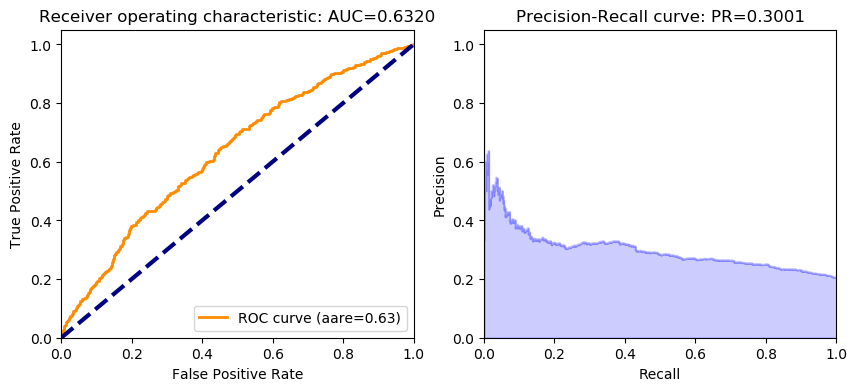

In [44]:
ROC_AUC(rf_v1,test_hex,'loan_default')

In [45]:
rf_v2 = H2ORandomForestEstimator(
        model_id = 'rf_v2',
        ntrees = 300,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v2.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [46]:
createGains(rf_v2)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,82,158,240,82,158,0.17,0.08,49.0,1.67,9.0,34.17
1,240,72,168,480,154,326,0.31,0.17,98.0,1.57,14.0,32.08
2,240,59,181,720,213,507,0.43,0.27,147.0,1.45,16.0,29.58
3,240,53,187,960,266,694,0.54,0.36,196.0,1.36,18.0,27.71
4,240,54,186,1200,320,880,0.65,0.46,245.0,1.31,19.0,26.67
5,240,44,196,1440,364,1076,0.74,0.56,294.0,1.24,18.0,25.28
6,240,40,200,1680,404,1276,0.82,0.67,343.0,1.18,15.0,24.05
7,240,36,204,1920,440,1480,0.90,0.77,392.0,1.12,13.0,22.92
8,240,28,212,2160,468,1692,0.96,0.89,441.0,1.06,7.0,21.67


In [51]:
rf_v3 = H2ORandomForestEstimator(
        model_id = 'rf_v3',
        ntrees = 500,
        nfolds=10,
        min_rows=100,
        seed=1234)
rf_v3.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [52]:
createGains(rf_v3)

drf prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,82,158,240,82,158,0.17,0.08,49.0,1.67,9.0,34.17
1,240,75,165,480,157,323,0.32,0.17,98.0,1.60,15.0,32.71
2,240,60,180,720,217,503,0.44,0.26,147.0,1.48,18.0,30.14
3,240,51,189,960,268,692,0.55,0.36,196.0,1.37,19.0,27.92
4,240,51,189,1200,319,881,0.65,0.46,245.0,1.30,19.0,26.58
5,240,46,194,1440,365,1075,0.74,0.56,294.0,1.24,18.0,25.35
6,240,37,203,1680,402,1278,0.82,0.67,343.0,1.17,15.0,23.93
7,240,38,202,1920,440,1480,0.90,0.77,392.0,1.12,13.0,22.92
8,240,27,213,2160,467,1693,0.95,0.89,441.0,1.06,6.0,21.62


drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



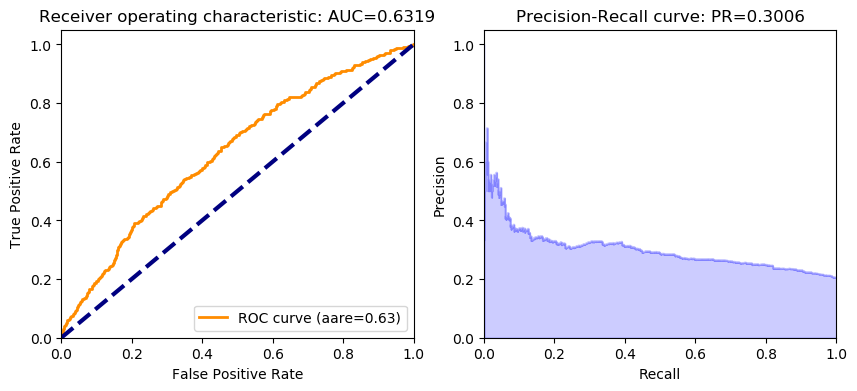

In [66]:
ROC_AUC(rf_v3,test_hex,'loan_default')

In [55]:
rf_v4 = H2ORandomForestEstimator(
        model_id = 'rf_v4',
        ntrees = 500,
        nfolds=10,
        min_rows=150,
        seed=1234)
rf_v4.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [56]:
createGains(rf_v4)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,78,162,240,78,162,0.16,0.08,49.0,1.59,8.0,32.50
1,240,76,164,480,154,326,0.31,0.17,98.0,1.57,14.0,32.08
2,240,63,177,720,217,503,0.44,0.26,147.0,1.48,18.0,30.14
3,240,50,190,960,267,693,0.54,0.36,196.0,1.36,18.0,27.81
4,240,50,190,1200,317,883,0.65,0.46,245.0,1.29,19.0,26.42
5,240,47,193,1440,364,1076,0.74,0.56,294.0,1.24,18.0,25.28
6,240,40,200,1680,404,1276,0.82,0.67,343.0,1.18,15.0,24.05
7,240,35,205,1920,439,1481,0.90,0.78,392.0,1.12,12.0,22.86
8,240,27,213,2160,466,1694,0.95,0.89,441.0,1.06,6.0,21.57


drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



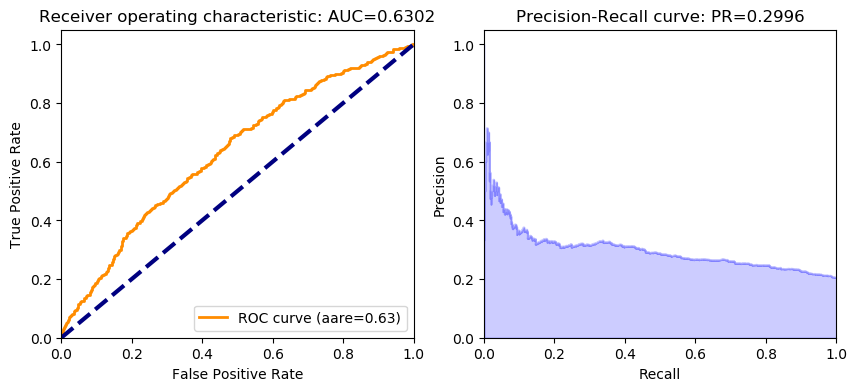

In [65]:
ROC_AUC(rf_v4,test_hex,'loan_default')

In [59]:
rf_v5 = H2ORandomForestEstimator(
        model_id = 'rf_v5',
        ntrees = 300,
        nfolds=10,
        min_rows=50,
        seed=1234)
rf_v5.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [60]:
createGains(rf_v5)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,79,161,240,79,161,0.16,0.08,49.0,1.61,8.0,32.92
1,240,72,168,480,151,329,0.31,0.17,98.0,1.54,14.0,31.46
2,240,68,172,720,219,501,0.45,0.26,147.0,1.49,19.0,30.42
3,240,52,188,960,271,689,0.55,0.36,196.0,1.38,19.0,28.23
4,240,47,193,1200,318,882,0.65,0.46,245.0,1.30,19.0,26.50
5,240,47,193,1440,365,1075,0.74,0.56,294.0,1.24,18.0,25.35
6,240,39,201,1680,404,1276,0.82,0.67,343.0,1.18,15.0,24.05
7,240,37,203,1920,441,1479,0.90,0.77,392.0,1.12,13.0,22.97
8,240,24,216,2160,465,1695,0.95,0.89,441.0,1.05,6.0,21.53


drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



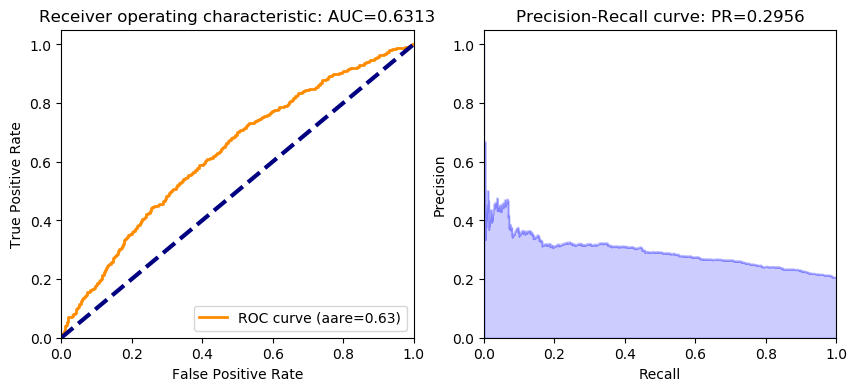

In [63]:
ROC_AUC(rf_v5,test_hex,'loan_default')

In [61]:
rf_v6 = H2ORandomForestEstimator(
        model_id = 'rf_v6',
        ntrees = 500,
        nfolds=10,
        min_rows=50,
        seed=1234)
rf_v6.train(predictors,target,training_frame=train_hex)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [62]:
createGains(rf_v6)

drf prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,79,161,240,79,161,0.16,0.08,49.0,1.61,8.0,32.92
1,240,75,165,480,154,326,0.31,0.17,98.0,1.57,14.0,32.08
2,240,63,177,720,217,503,0.44,0.26,147.0,1.48,18.0,30.14
3,240,53,187,960,270,690,0.55,0.36,196.0,1.38,19.0,28.12
4,240,50,190,1200,320,880,0.65,0.46,245.0,1.31,19.0,26.67
5,240,43,197,1440,363,1077,0.74,0.56,294.0,1.23,18.0,25.21
6,240,41,199,1680,404,1276,0.82,0.67,343.0,1.18,15.0,24.05
7,240,37,203,1920,441,1479,0.90,0.77,392.0,1.12,13.0,22.97
8,240,25,215,2160,466,1694,0.95,0.89,441.0,1.06,6.0,21.57


drf prediction progress: |████████████████████████████████████████████████| 100%

   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



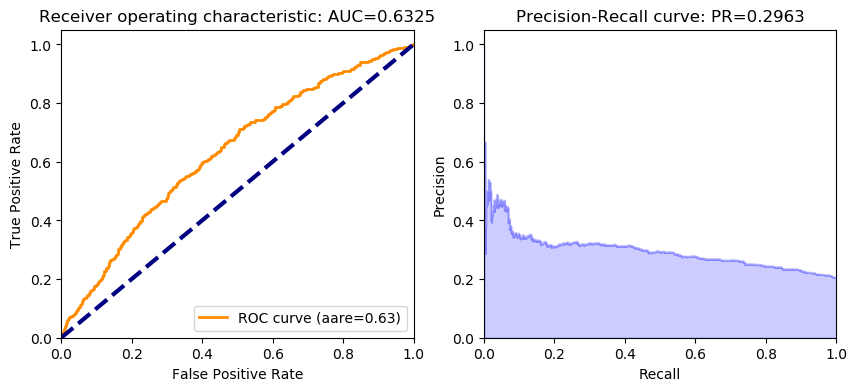

In [64]:
ROC_AUC(rf_v6,test_hex,'loan_default')

After running 6 different iterations of the random forest model I found that model number 6 had the best AUC value at 0.6325 and provided a lift of 1.61 and gain of 32.92 for decile equal to 0. The next best performing model was model number 1 with a AUC value of 0.6320, a lift of 1.67 and a gain value of 34.17 in decile equal to 0. 

## Gradient Boosting Machine

In [47]:
gbm_v1 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v1',
        fold_assignment='auto',
        seed=1234)
gbm_v1.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


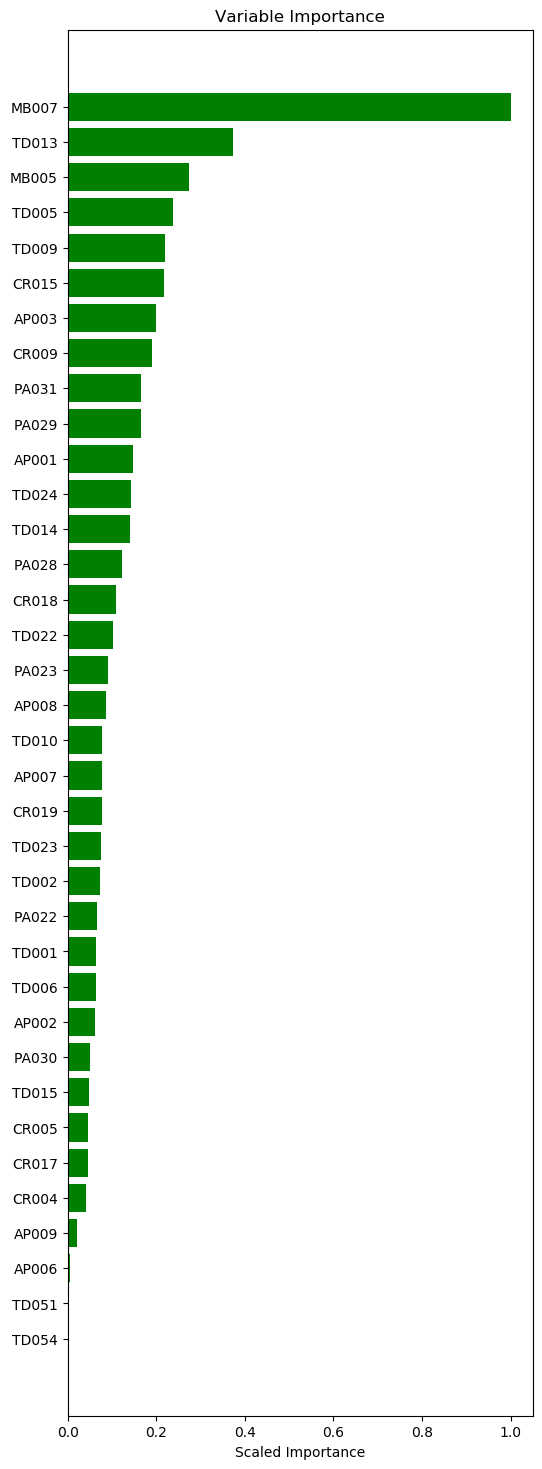

In [48]:
VarImp(gbm_v1)

In [49]:
createGains(gbm_v1)

gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,80,160,240,80,160,0.16,0.08,49.0,1.63,8.0,33.33
1,240,62,178,480,142,338,0.29,0.18,98.0,1.45,11.0,29.58
2,240,68,172,720,210,510,0.43,0.27,147.0,1.43,16.0,29.17
3,240,62,178,960,272,688,0.56,0.36,196.0,1.39,20.0,28.33
4,240,40,200,1200,312,888,0.64,0.46,245.0,1.27,18.0,26.00
5,240,48,192,1440,360,1080,0.73,0.57,294.0,1.22,16.0,25.00
6,240,45,195,1680,405,1275,0.83,0.67,343.0,1.18,16.0,24.11
7,240,30,210,1920,435,1485,0.89,0.78,392.0,1.11,11.0,22.66
8,240,33,207,2160,468,1692,0.96,0.89,441.0,1.06,7.0,21.67


gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



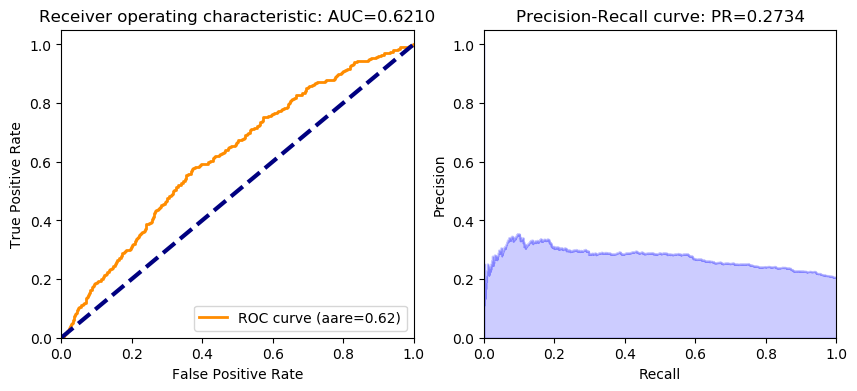

In [50]:
ROC_AUC(gbm_v1,test_hex,'loan_default')

In [74]:
gbm_v2 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v2',
        nfolds=5,
        ntrees=100,
        seed=1234)
gbm_v2.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████████████| 100%


In [75]:
createGains(gbm_v2)

gbm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,77,163,240,77,163,0.16,0.09,49.0,1.57,7.0,32.08
1,240,66,174,480,143,337,0.29,0.18,98.0,1.46,11.0,29.79
2,240,65,175,720,208,512,0.42,0.27,147.0,1.41,15.0,28.89
3,240,56,184,960,264,696,0.54,0.36,196.0,1.35,18.0,27.50
4,240,45,195,1200,309,891,0.63,0.47,245.0,1.26,16.0,25.75
5,240,42,198,1440,351,1089,0.72,0.57,294.0,1.19,15.0,24.38
6,240,45,195,1680,396,1284,0.81,0.67,343.0,1.15,14.0,23.57
7,240,39,201,1920,435,1485,0.89,0.78,392.0,1.11,11.0,22.66
8,240,31,209,2160,466,1694,0.95,0.89,441.0,1.06,6.0,21.57


gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



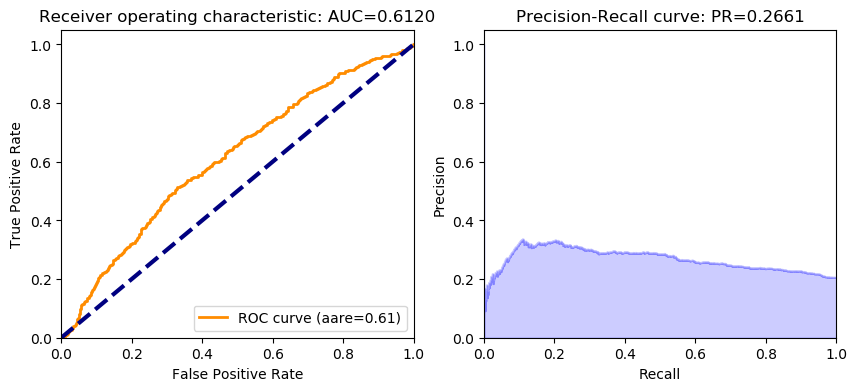

In [76]:
ROC_AUC(gbm_v2,test_hex,'loan_default')

In [77]:
gbm_v3 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v3',
        nfolds=5,
        ntrees=300,
        fold_assignment="auto",
        seed=1234)
gbm_v3.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [78]:
createGains(gbm_v3)

gbm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,74,166,240,74,166,0.15,0.09,49.0,1.51,6.0,30.83
1,240,57,183,480,131,349,0.27,0.18,98.0,1.34,9.0,27.29
2,240,68,172,720,199,521,0.41,0.27,147.0,1.35,14.0,27.64
3,240,56,184,960,255,705,0.52,0.37,196.0,1.30,15.0,26.56
4,240,47,193,1200,302,898,0.62,0.47,245.0,1.23,15.0,25.17
5,240,42,198,1440,344,1096,0.70,0.57,294.0,1.17,13.0,23.89
6,240,44,196,1680,388,1292,0.79,0.68,343.0,1.13,11.0,23.10
7,240,47,193,1920,435,1485,0.89,0.78,392.0,1.11,11.0,22.66
8,240,31,209,2160,466,1694,0.95,0.89,441.0,1.06,6.0,21.57


gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



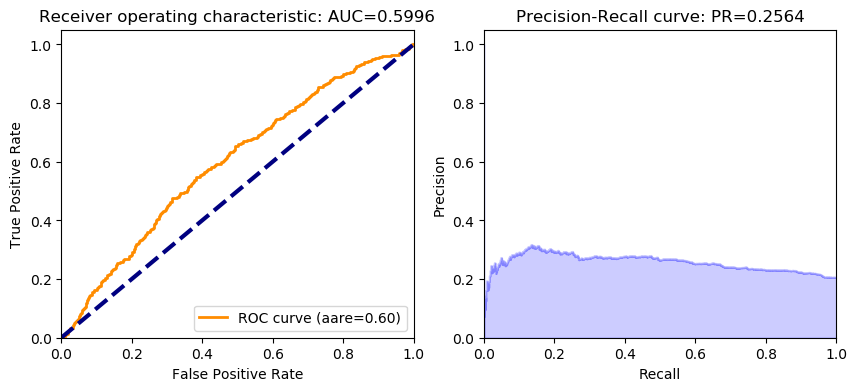

In [79]:
ROC_AUC(gbm_v3,test_hex,'loan_default')

In [81]:
gbm_v4 = H2OGradientBoostingEstimator(
        model_id = 'gbm_v4',
        nfolds=5,
        ntrees=300,
        max_depth=5,
        min_rows=100,
        fold_assignment="auto",
        seed=1234)
gbm_v4.train(predictors,target,training_frame=train_hex)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [82]:
createGains(gbm_v4)

gbm prediction progress: |████████████████████████████████████████████████| 100%


,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,240,81,159,240,81,159,0.17,0.08,49.0,1.65,9.0,33.75
1,240,67,173,480,148,332,0.30,0.17,98.0,1.51,13.0,30.83
2,240,59,181,720,207,513,0.42,0.27,147.0,1.41,15.0,28.75
3,240,57,183,960,264,696,0.54,0.36,196.0,1.35,18.0,27.50
4,240,43,197,1200,307,893,0.63,0.47,245.0,1.25,16.0,25.58
5,240,46,194,1440,353,1087,0.72,0.57,294.0,1.20,15.0,24.51
6,240,41,199,1680,394,1286,0.80,0.67,343.0,1.15,13.0,23.45
7,240,34,206,1920,428,1492,0.87,0.78,392.0,1.09,9.0,22.29
8,240,38,202,2160,466,1694,0.95,0.89,441.0,1.06,6.0,21.57


gbm prediction progress: |████████████████████████████████████████████████| 100%


C:\Users\rdiml\Anaconda3\lib\site-packages\h2o\job.py:70: UserWarning: Test/Validation dataset column 'MB007' has levels not trained on: [HTC, IPHONE3, IVVI, KINGSUN, SONY, ZUK]
  warnings.warn(w)



   * ROC curve: The ROC curve plots the true positive rate vs. the false rositive sate

	  * The area under the curve (AUC): A value between 0.5 (random) and 1.0 (perfect), measuring the prediction accuracy

   * Recall (R) = The number of true positives / (the number of true positives + the number of false negatives)



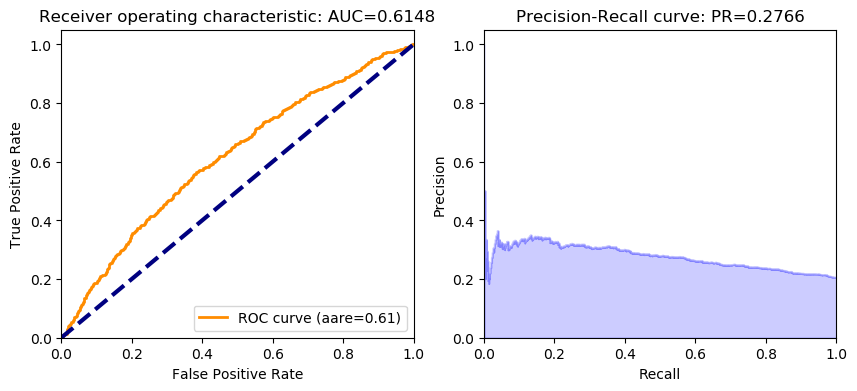

In [83]:
ROC_AUC(gbm_v4,test_hex,'loan_default')

After running the gradient boosting machine model 4 times I found that model number 4 produced the best results, its AUC value was 0.6148, lift was 1.65, and gain was 33.75. After model 4, model 1 had the next best performance with an AUC 0.6210, a lift of 1.63, and a gain of 33.33 in decile 0. 